In [2]:
%matplotlib notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_2017 = "survey_2017.csv"
df_17 = pd.read_csv(data_2017)

data_2016 = "survey_2016.csv"
df_16 = pd.read_csv(data_2016)

data_2014 = "survey_2014.csv"
df_14 = pd.read_csv(data_2014)

data_2018 = "survey_2018.csv"
df_18 = pd.read_csv(data_2018)

data_2019 = "survey_2019.csv"
df_19 = pd.read_csv(data_2019)

In [5]:
interview_2014 = df_14["Would you bring up a physical health issue with a potential employer in an interview?"]
interview_2016 = df_16["Would you be willing to bring up a physical health issue with a potential employer in an interview?"]
interview_2017 = df_17["Would you be willing to bring up a physical health issue with a potential employer in an interview?"]
interview_2018 = df_18["Would you be willing to bring up a physical health issue with a potential employer in an interview?"]
interview_2019 = df_19["Would you be willing to bring up a physical health issue with a potential employer in an interview?"]

In [6]:
years_df = pd.DataFrame({
    "interview 14": interview_2014,
    "interview 16": interview_2016,
    "interview 17": interview_2017,
    "interview 18": interview_2018,
    "interview 19": interview_2019
})

In [7]:
years_df

,interview 14,interview 16,interview 17,interview 18,interview 19
0,Maybe,Maybe,Yes,No,Yes
1,No,Maybe,Yes,Yes,No
2,Yes,Yes,Maybe,No,Maybe
3,Maybe,Yes,No,No,No
4,Yes,Maybe,Maybe,Yes,No
...,...,...,...,...,...
1428,NaN,No,NaN,NaN,NaN
1429,NaN,Maybe,NaN,NaN,NaN
1430,NaN,Maybe,NaN,NaN,NaN
1431,NaN,Maybe,NaN,NaN,NaN


In [8]:
df = years_df.apply(pd.Series.value_counts)

In [9]:
df

,interview 14,interview 16,interview 17,interview 18,interview 19
Maybe,558,633,303,177,152
No,500,441,278,161,114
Yes,202,359,175,79,86


In [10]:
df['pct_2014'] = df['interview 14']/df['interview 14'].sum()*100

In [11]:
df['pct_2016'] = df['interview 16']/df['interview 16'].sum()*100

In [12]:
df['pct_2017'] = df['interview 17']/df['interview 17'].sum()*100

In [13]:
df['pct_2018'] = df['interview 18']/df['interview 18'].sum()*100

In [14]:
df['pct_2019'] = df['interview 19']/df['interview 19'].sum()*100

In [15]:
df

,interview 14,interview 16,interview 17,interview 18,interview 19,pct_2014,pct_2016,pct_2017,pct_2018,pct_2019
Maybe,558,633,303,177,152,44.285714,44.173064,40.079365,42.446043,43.181818
No,500,441,278,161,114,39.682540,30.774599,36.772487,38.609113,32.386364
Yes,202,359,175,79,86,16.031746,25.052338,23.148148,18.944844,24.431818


In [16]:
plot_df = df[['pct_2014', 'pct_2016','pct_2017','pct_2018','pct_2019']]

In [17]:
plot_df

,pct_2014,pct_2016,pct_2017,pct_2018,pct_2019
Maybe,44.285714,44.173064,40.079365,42.446043,43.181818
No,39.682540,30.774599,36.772487,38.609113,32.386364
Yes,16.031746,25.052338,23.148148,18.944844,24.431818


In [18]:
maybe_df = plot_df.loc['Maybe', :]
maybe_df_q = pd.DataFrame(data=maybe_df)
maybe_df_q = maybe_df_q.reset_index()
maybe_df_q

,index,Maybe
0,pct_2014,44.285714
1,pct_2016,44.173064
2,pct_2017,40.079365
3,pct_2018,42.446043
4,pct_2019,43.181818


In [19]:
no_df = plot_df.loc['No', :]
no_df
no_df_q = pd.DataFrame(data=no_df)
no_df_q = no_df_q.reset_index()
no_df_q

,index,No
0,pct_2014,39.682540
1,pct_2016,30.774599
2,pct_2017,36.772487
3,pct_2018,38.609113
4,pct_2019,32.386364


In [20]:
Yes_df = plot_df.loc['Yes', :]
Yes_df
yes_df_q = pd.DataFrame(data=Yes_df)
yes_df_q = yes_df_q.reset_index()
yes_df_q

,index,Yes
0,pct_2014,16.031746
1,pct_2016,25.052338
2,pct_2017,23.148148
3,pct_2018,18.944844
4,pct_2019,24.431818


<IPython.core.display.Javascript object>


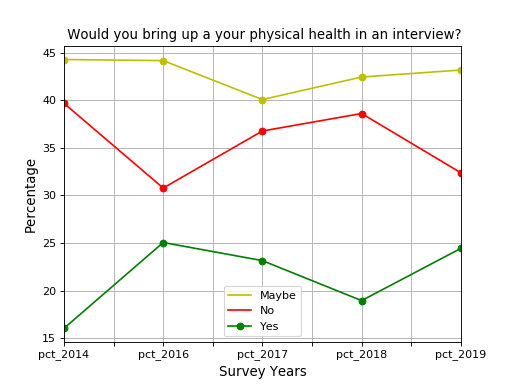

In [22]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
#ax=ax2 

maybe_df_q.plot(x="index", y=["Maybe"], ax=ax, marker='o', color='y')
no_df_q.plot(x="index", y=["No"], ax=ax, marker='o', color='r')
yes_df_q.plot(x="index", y=["Yes"], ax=ax, marker='o', color='g')
plt.grid()
#yes_df_q.plot(x="index", y=["Yes"], ax=ax2, ls="--", color='g')
plt.title(' Would you bring up a your physical health in an interview?')
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Survey Years', fontsize=12)
plt.show()
plt.savefig("Images/14_16_17_18_19_physicalhealth_interview.png")